# Prediction using Supervised ML

## -By Kowsik Nandagopan D, Data Science and Business Analyst Intern at TSF

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables. 

**Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. <br><br>
`y = mX + c`<br>
where, y is the predicted value (target), X is the feature, m is slope, c is y intercept

## Data Preparation

In [1]:
# Import Required library for data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Loaded")

Loaded


In [3]:
# First 5 values in dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Shape of dataset
print("Total data-points: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Total data-points:  25
Number of columns:  2


In [5]:
# Check data types of colums
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# Checking for duplicates dataset
dup = df[df.duplicated()]
print("Number of duplicated data points", dup.shape)

Number of duplicated data points (0, 2)


In [7]:
# Check for NaN or Null Data-points
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing Dataset

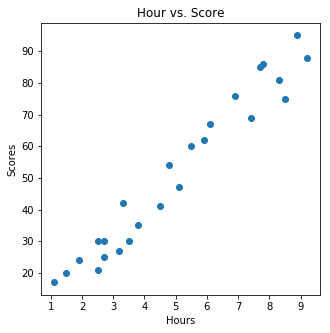

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(df.Hours, df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hour vs. Score")
plt.show()

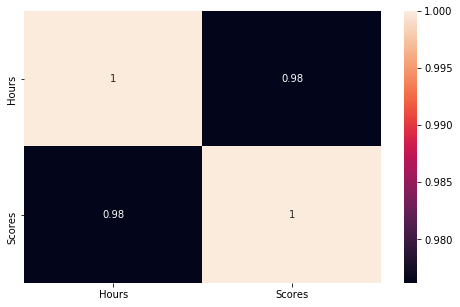

In [9]:
# To plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Traing Model
### Import requied `sklearn` libraries

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Split the dataset to features and target variables

In [11]:
X = df[["Hours"]]
y = df[["Scores"]]

### Split dataset to train-test
Here we take `20%` of total dataset for testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

### Initialize Model

In [14]:
model = LinearRegression(normalize=False)

#### Fit dataset

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("So our formula for prediction is y = {}X + {}".format(model.coef_[0][0], model.intercept_[0]))

So our formula for prediction is y = 9.91065648064224X + 2.018160041434662


## Evaluate Accuracy of model
Using the `20%` data we evaluate the accuracy of model

In [17]:
print("Model Score:", model.score(X_test, y_test))
y_test_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred)) 

Model Score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982


## Visualize Prediction

In [18]:
pred = model.predict(df[["Hours"]])

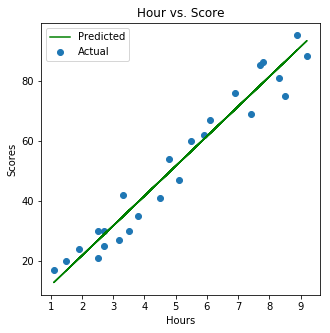

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(df.Hours, df.Scores, label="Actual")
plt.plot(df.Hours, pred, color="green", label="Predicted")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.title("Hour vs. Score")
plt.show()

## Predicting Score 

In [20]:
x = 9.25
prd = model.predict(np.array(x).reshape(-1, 1))
print("If student studies for", x, "hrs/day, then predicted score is", prd[0][0])

If student studies for 9.25 hrs/day, then predicted score is 93.69173248737539


## Save Model

We must save model for later use. So we don't need to run above code all the time.

In [21]:
import joblib

In [22]:
joblib.dump(model, 'student-score-prediction.joblib')

['student-score-prediction.joblib']

In [23]:
# Testing saved model
m = joblib.load('student-score-prediction.joblib')
print("Model Score:", m.score(X_test, y_test))
y_test_pred = m.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred)) 

Model Score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982
